In [3]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
cv = pd.read_csv('C:/Users/user/Desktop/training.csv')

In [5]:
cv.tail()

,month,id
212,2015-09-01,1473.52
213,2015-10-01,1452.64
214,2015-11-01,1442.75
215,2015-12-01,1434.31
216,2016-01-01,1420.75


In [6]:
X = cv.drop(['month'], axis = 1) #id мы будем предсказывать

In [7]:
y = cv.month #.astype(float) # y = data['Sort'].astype(float)

In [8]:
#X = pd.get_dummies(X)

In [9]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [10]:
X.isnull().sum()
#clf.fit(X, y)

id    0
dtype: int64

In [11]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape

(145, 1)

In [15]:
X_test.shape

(72, 1)

In [16]:
clf.score(X,y)

1.0

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
clf.score(X_train, y_train)

1.0

In [19]:
clf.score(X_test, y_test)

0.0

In [20]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =  3)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
clf.score(X_train, y_train)

0.05517241379310345

In [23]:
clf.score(X_test, y_test)

0.0

In [24]:
max_depth_values = range(1,100)

In [25]:
scores_data = pd.DataFrame()

In [26]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =  max_depth)
    clf.fit(X_train, y_train) # обучение на train - выборке
    train_score = clf.score(X_train, y_train)# предсказывать точность классификации на train - выборке
    test_score =clf.score(X_test, y_test)
    
    #mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})#, 'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [27]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.013793,0.0
0,2,0.027586,0.0
0,3,0.055172,0.0
0,4,0.110345,0.0
0,5,0.220690,0.0


In [28]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'], var_name ='set_type', value_name ='score')

In [29]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.013793
1,2,train_score,0.027586
2,3,train_score,0.055172
3,4,train_score,0.110345
4,5,train_score,0.220690
...,...,...,...
193,95,test_score,0.000000
194,96,test_score,0.000000
195,97,test_score,0.000000
196,98,test_score,0.000000


<AxesSubplot:xlabel='max_depth', ylabel='score'>

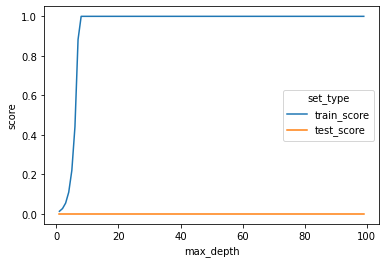

In [30]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =  4)

In [33]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [36]:
parametrs = {'criterion': ['gini', 'entropy'], max_depth : range(1,30)} 

In [37]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv = 5)

In [38]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={99: range(1, 30), 'criterion': ['gini', 'entropy']})

In [41]:
grid_search_cv_clf = int(grid_search_cv_clf.fit(X_train, y_train))

TypeError: '<' not supported between instances of 'int' and 'str'